In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models

C:\Users\Тимофей\AppData\Roaming\Python\Python310\site-packages\scipy\__init__.py:160: UserWarning: A NumPy version >=1.19.5 and <1.27.0 is required for this version of SciPy (detected version 2.0.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"

A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "E:\Zmiya\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "E:\Zmiya\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "E:\Zmiya\lib\site-packages\ipykernel_launcher.py", l

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "E:\Zmiya\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "E:\Zmiya\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "E:\Zmiya\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "E:\Zmiya\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "E:\Zmiya\lib\site-packages\ipykernel\kernelapp.py", line 711, in start
    self.io_loop.start()
  File

AttributeError: _ARRAY_API not found

In [2]:
import numpy as np
import pandas as pd

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("stealthknight/bird-vs-drone")

print("Path to dataset files:", path)

100%|█████████████████████████████████████████████████████████████████████████████| 1.05G/1.05G [01:24<00:00, 13.4MB/s]

Extracting files...


Path to dataset files: C:\Users\Тимофей\.cache\kagglehub\datasets\stealthknight\bird-vs-drone\versions\1


In [4]:
dataset_path = path

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
# Створюємо генератори зображень для навчання та валідації з feature engineering
train_datagen = ImageDataGenerator(
    validation_split=0.2  # 20% на валідацію
)


In [7]:
# Генератор для навчального набору
train_generator = train_datagen.flow_from_directory(
    dataset_path+"/Dataset/train",
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='training'
)


Found 14659 images belonging to 2 classes.


In [8]:

# Генератор для валідаційного набору
val_generator = train_datagen.flow_from_directory(
    dataset_path+"/Dataset/valid",
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 348 images belonging to 2 classes.


In [9]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Бінарна класифікація
])


In [10]:
# Компільовуємо модель
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [11]:
# Виводимо архітектуру
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 126, 126, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 61, 61, 64)        256       
 chNormalization)                                                
                                                        

In [12]:
# Навчаємо модель
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=val_generator
)

Epoch 1/15
459/459 [==============================] - 278s 604ms/step - loss: 0.0202 - accuracy: 0.9981 - val_loss: 3.6987e-21 - val_accuracy: 1.0000
Epoch 2/15
459/459 [==============================] - 159s 346ms/step - loss: 0.0232 - accuracy: 0.9990 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/15
459/459 [==============================] - 158s 344ms/step - loss: 0.0032 - accuracy: 0.9999 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/15
459/459 [==============================] - 170s 371ms/step - loss: 8.0540e-05 - accuracy: 0.9999 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/15
459/459 [==============================] - 175s 380ms/step - loss: 3.7059e-06 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/15
459/459 [==============================] - 152s 331ms/step - loss: 3.0447e-15 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/15
459/459 [==============================] - 153s 333ms/step - loss: 7.1707e-12

In [13]:
model.save("bird_vs_drone_cnn_baseline.keras")

Проведемо Feature engineering

Застосуємо спершу нормалізацію та аугментацію даних. Останнє дозволить нам збільшити різноманітність навчальних даних без потреби в додаткових зображеннях, а нормалізація допомагає моделі швидше та стабільніше навчатися.


1. rescale=1.0/255

Що це:
Нормалізація пікселів з діапазону [0, 255] до [0, 1].

Навіщо:
Полегшує та пришвидшує навчання моделі, стабілізує градієнти.


2. rotation_range=20

Що це:
Випадкове обертання зображень до ±20 градусів.

Навіщо:
Модель стає стійкішою до орієнтації об’єкта (наприклад, дрон може бути під нахилом).


3. width_shift_range=0.2 і height_shift_range=0.2

Що це:
Зсув зображення по ширині або висоті на ±20% від розміру.

Навіщо:
Імітує зміщення об'єкта в кадрі. Модель не повинна залежати від точного положення об'єкта.


4. shear_range=0.2

Що це:
Застосування зсуву (shear) до зображення.

Навіщо:
Імітує спотворення перспективи, що часто трапляється в реальних фото/відео.


5. zoom_range=0.2

Що це:
Збільшує або зменшує зображення випадково на ±20%.

Навіщо:
Дозволяє моделі впізнавати об’єкти при різних масштабах.


6. horizontal_flip=True

Що це:
Випадкове горизонтальне віддзеркалення.

Навіщо:
Модель навчається не залежати від напрямку об’єкта (особливо важливо, якщо об'єкти симетричні).


7. validation_split=0.2

Що це:
Відокремлення частини даних для валідації.

Навіщо:
Дозволяє контролювати переобучення й оцінювати якість навчання.

In [14]:
# Створюємо генератори зображень для навчання та валідації з feature engineering
train_datagen1 = ImageDataGenerator(
    rescale=1.0/255,  # Нормалізація пікселів у діапазон [0,1]
    rotation_range=20, # Випадкове обертання зображень до ±20 градусів.
    width_shift_range=0.2, # Зсув зображення по ширині на ±20% від розміру.
    height_shift_range=0.2, # Зсув зображення по висоті на ±20% від розміру.
    shear_range=0.2, # Застосування зсуву (shear) до зображення.
    zoom_range=0.2, # Збільшує або зменшує зображення випадково на ±20%.
    horizontal_flip=True, #Випадкове горизонтальне віддзеркалення.
    validation_split=0.2  # 20% на валідацію
)


In [15]:
# Генератор для навчального набору
train_generator = train_datagen1.flow_from_directory(
    dataset_path+"/Dataset/train",
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

Found 14659 images belonging to 2 classes.


In [16]:
# Генератор для валідаційного набору
val_generator = train_datagen1.flow_from_directory(
    dataset_path+"/Dataset/valid",
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 348 images belonging to 2 classes.


In [17]:
model1 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Бінарна класифікація
])


In [18]:
# Компільовуємо модель
model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [19]:
# Виводимо архітектуру
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 126, 126, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_4 (Bat  (None, 61, 61, 64)        256       
 chNormalization)                                                
                                                      

In [20]:
# Навчаємо модель
history1 = model1.fit(
    train_generator,
    epochs=15,
    validation_data=val_generator
)

Epoch 1/15
459/459 [==============================] - 158s 341ms/step - loss: 0.0180 - accuracy: 0.9977 - val_loss: 4.7719e-32 - val_accuracy: 1.0000
Epoch 2/15
459/459 [==============================] - 158s 343ms/step - loss: 3.3332e-10 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/15
459/459 [==============================] - 164s 357ms/step - loss: 0.0063 - accuracy: 0.9998 - val_loss: 3.3259e-29 - val_accuracy: 1.0000
Epoch 4/15
459/459 [==============================] - 183s 398ms/step - loss: 0.0017 - accuracy: 0.9999 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/15
459/459 [==============================] - 189s 411ms/step - loss: 1.5948e-04 - accuracy: 0.9999 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/15
459/459 [==============================] - 185s 404ms/step - loss: 8.1587e-14 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/15
459/459 [==============================] - 188s 409ms/step - loss: 6.0527e-17

In [25]:
# ** Порівняння результатів**
def plot_results(history_cnn, history_finetune, history_finetune_2):
    plt.figure(figsize=(12, 5))

    # Порівняння точності
    plt.subplot(1, 2, 1)
    plt.plot(history_cnn.history['accuracy'], label="CNN Accuracy")
    plt.plot(history_finetune.history['accuracy'], label="CNN after augmentation and normalisation")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.title("Порівняння точності моделей")

    # Порівняння втрат
    plt.subplot(1, 2, 2)
    plt.plot(history_cnn.history['loss'], label="CNN Loss")
    plt.plot(history_finetune.history['loss'], label="CNN after augmentation and normalisation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.title("Порівняння втрат моделей")

    plt.show()

In [26]:
import matplotlib.pyplot as plt

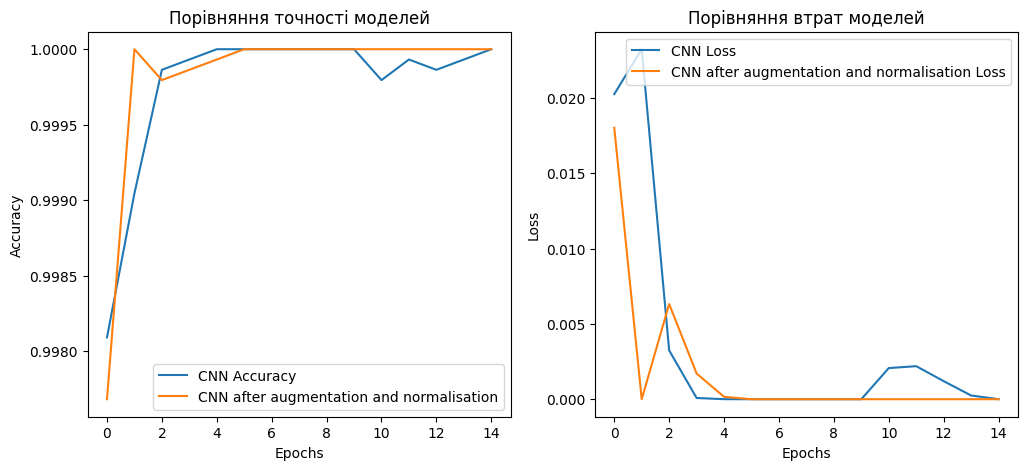

In [27]:
plot_results(history, history1, history1)

Висновок: виконавши роботу можна побачити, що базова CNN досягає непоганої точності, оскільки вона навчається з нуля і не має попередніх знань про особливості птахів і дронів. Її згорткові шари поступово вчаться знаходити патерни в зображеннях, проте через обмежений обсяг даних модель може переобучитися або не навчитися розпізнавати складні випадки. Так, на порівнянні точності можна побачити падіння у подальших epoch (10-13), а також приблизно на них же збільшення втрат, плюс збільшення великі втрати на початку навчання.


Якщо ж подивитися після проведення нормалізації та аугментації, то втрати зразу падають, дещо піднімаються і лишаються далі низькими, а точність за схожим, але дещо зеркальним, паттерном трохи падає спершу, але потім залишається високою